In [1]:
# “What are the top ten most dangerous intersections?”
# Outline:
# 1. Clean data to highlight relevant columns and filter out missing values
# 2. Filter columns by the most common on street name
# 3. Filter by most common cross street name associated with the street name
# 4. Display results

#import dependencies
import hvplot.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
# #Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

csv_path = "Q1_resources/Q1_Motor_Vehicle_Collisions_-_Crashes.csv"


In [2]:
#create a data frame with the csv file
df = pd.read_csv(csv_path)
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033261,09/19/2023,15:55,NaN,NaN,40.761436,-73.761760,"(40.761436, -73.76176)",NORTHERN BOULEVARD,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4663574,2 dr sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2033262,09/14/2023,23:15,MANHATTAN,10016.0,40.744064,-73.987755,"(40.744064, -73.987755)",WEST 27 STREET,5 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4664015,Sedan,NaN,NaN,NaN,NaN
2033263,09/12/2023,16:00,QUEENS,11433.0,40.707947,-73.783310,"(40.707947, -73.78331)",JAMAICA AVENUE,178 STREET,NaN,...,NaN,NaN,NaN,NaN,4664202,Sedan,NaN,NaN,NaN,NaN
2033264,09/19/2023,10:45,NaN,NaN,40.840230,-73.880104,"(40.84023, -73.880104)",EAST TREMONT AVENUE,BOSTON ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4663887,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [3]:
df['ZIP CODE'] = df['ZIP CODE'].str.replace('     ','-1').fillna('-1').astype(int)


In [4]:
Location_df = df[['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',]]
Location_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME
0,09/11/2021,2:39,NaN,-1,NaN,WHITESTONE EXPRESSWAY,20 AVENUE
1,03/26/2022,11:45,NaN,-1,NaN,QUEENSBORO BRIDGE UPPER,NaN
2,06/29/2022,6:55,NaN,-1,NaN,THROGS NECK BRIDGE,NaN
3,09/11/2021,9:35,BROOKLYN,-1,"(40.667202, -73.8665)",NaN,NaN
4,12/14/2021,8:13,BROOKLYN,-1,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET
...,...,...,...,...,...,...,...
2033261,09/19/2023,15:55,NaN,-1,"(40.761436, -73.76176)",NORTHERN BOULEVARD,NaN
2033262,09/14/2023,23:15,MANHATTAN,-1,"(40.744064, -73.987755)",WEST 27 STREET,5 AVENUE
2033263,09/12/2023,16:00,QUEENS,-1,"(40.707947, -73.78331)",JAMAICA AVENUE,178 STREET
2033264,09/19/2023,10:45,NaN,-1,"(40.84023, -73.880104)",EAST TREMONT AVENUE,BOSTON ROAD


In [5]:
Borough_Count = Location_df['BOROUGH'].value_counts()
Borough_Count

BOROUGH
BROOKLYN         444743
QUEENS           375233
MANHATTAN        315183
BRONX            206837
STATEN ISLAND     58727
Name: count, dtype: int64

In [6]:
ZIP_Count = Location_df['ZIP CODE'].value_counts()
ZIP_Count

ZIP CODE
-1        1633881
 11207       7063
 11101       5906
 10022       5782
 10016       5758
           ...   
 10168          4
 10803          2
 10048          1
 10153          1
 10162          1
Name: count, Length: 194, dtype: int64

In [7]:
Street_Count = Location_df['ON STREET NAME'].value_counts()
Street_Count.head(20)

ON STREET NAME
BROADWAY                            17277
ATLANTIC AVENUE                     15322
BELT PARKWAY                        13543
3 AVENUE                            12476
NORTHERN BOULEVARD                  11965
LONG ISLAND EXPRESSWAY               9928
BROOKLYN QUEENS EXPRESSWAY           9743
FLATBUSH AVENUE                      9741
LINDEN BOULEVARD                     9587
QUEENS BOULEVARD                     9368
2 AVENUE                             9010
GRAND CENTRAL PKWY                   8440
BRUCKNER BOULEVARD                   8190
FDR DRIVE                            7519
5 AVENUE                             6767
JAMAICA AVENUE                       6746
MAJOR DEEGAN EXPRESSWAY              6186
CROSS BRONX EXPY                     6051
7 AVENUE                             5975
8 AVENUE                             5923
Name: count, dtype: int64

In [8]:
specific_streets = ['BROADWAY', 'ATLANTIC AVENUE', 'BELT PARKWAY', '3 AVENUE', 'NORTHERN BOULEVARD', 'LONG ISLAND EXPRESSWAY',
 'BROOKLYN QUEENS EXPRESSWAY', 'FLATBUSH AVENUE', 'LINDEN BOULEVARD', 'QUEENS BOULEVARD', '2 AVENUE', 'GRAND CENTRAL PKWY',
  'BRUCKNER BOULEVARD', 'FDR DRIVE', '5 AVENUE', 'JAMAICA AVENUE', 'MAJOR DEEGAN EXPRESSWAY', 'CROSS BRONX EXPY', '7 AVENUE',
  '8 AVENUE']

FirstStreet_df = Location_df[Location_df['ON STREET NAME'].isin(specific_streets)]
FirstStreet_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME
6,12/14/2021,17:05,NaN,-1,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN
9,12/14/2021,14:58,MANHATTAN,-1,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET
13,12/14/2021,0:59,NaN,-1,"(40.59662, -74.00231)",BELT PARKWAY,NaN
21,12/14/2021,5:46,NaN,-1,"(40.744644, -73.77041)",LONG ISLAND EXPRESSWAY,NaN
48,04/24/2022,9:51,NaN,-1,"(40.85169, -73.95238)",CROSS BRONX EXPY,NaN
...,...,...,...,...,...,...,...
2033227,09/19/2023,11:49,NaN,-1,NaN,MAJOR DEEGAN EXPRESSWAY,NaN
2033232,09/19/2023,23:47,NaN,-1,NaN,BELT PARKWAY,NaN
2033245,09/19/2023,21:32,BROOKLYN,-1,"(40.668667, -73.868324)",LINDEN BOULEVARD,CRESCENT STREET
2033261,09/19/2023,15:55,NaN,-1,"(40.761436, -73.76176)",NORTHERN BOULEVARD,NaN


In [9]:
FirstStreet_df.sort_values(by = "ON STREET NAME", inplace=True, ascending=False)
FirstStreet_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME
1960017,06/26/2023,16:00,NaN,-1,NaN,QUEENS BOULEVARD,UNION TURNPIKE
1993469,07/29/2023,6:10,QUEENS,-1,"(40.744453, -73.92983)",QUEENS BOULEVARD,35 STREET
19786,05/14/2021,20:02,QUEENS,-1,"(40.730137, -73.862366)",QUEENS BOULEVARD,63 ROAD
1992923,02/10/2023,6:00,QUEENS,-1,"(40.746033, -73.93441)",QUEENS BOULEVARD,SKILLMAN AVENUE
98355,11/17/2021,16:22,QUEENS,-1,"(40.74456, -73.93076)",QUEENS BOULEVARD,34 STREET
...,...,...,...,...,...,...,...
140267,06/11/2022,18:45,BROOKLYN,-1,"(40.65807, -74.00763)",2 AVENUE,34 STREET
114670,03/03/2022,6:56,MANHATTAN,-1,"(40.73235, -73.984955)",2 AVENUE,EAST 14 STREET
2019285,04/21/2023,10:43,MANHATTAN,-1,"(40.73978, -73.97951)",2 AVENUE,EAST 26 STREET
1942075,10/09/2022,20:15,MANHATTAN,-1,"(40.75613, -73.96761)",2 AVENUE,EAST 52 STREET


In [10]:
FirstStreet_Count = FirstStreet_df['ON STREET NAME'].value_counts()
FirstStreet_Count

ON STREET NAME
BELT PARKWAY                  3905
BROOKLYN QUEENS EXPRESSWAY    2399
LONG ISLAND EXPRESSWAY        2316
BROADWAY                      2214
FDR DRIVE                     1980
ATLANTIC AVENUE               1948
GRAND CENTRAL PKWY            1761
MAJOR DEEGAN EXPRESSWAY       1630
3 AVENUE                      1374
LINDEN BOULEVARD              1352
CROSS BRONX EXPY              1260
NORTHERN BOULEVARD            1092
BRUCKNER BOULEVARD            1091
FLATBUSH AVENUE               1049
2 AVENUE                       874
QUEENS BOULEVARD               828
JAMAICA AVENUE                 805
5 AVENUE                       650
7 AVENUE                       617
8 AVENUE                       590
Name: count, dtype: int64

In [11]:
FirstStreet_Count = FirstStreet_df['ON STREET NAME'].value_counts()
FirstStreet_Count_df = pd.DataFrame({'ON STREET NAME': FirstStreet_Count.index, 'Count': FirstStreet_Count.values})
FirstStreet_Count_df


,ON STREET NAME,Count
0,BELT PARKWAY,3905
1,BROOKLYN QUEENS EXPRESSWAY,2399
2,LONG ISLAND EXPRESSWAY,2316
3,BROADWAY,2214
4,FDR DRIVE,1980
5,ATLANTIC AVENUE,1948
6,GRAND CENTRAL PKWY,1761
7,MAJOR DEEGAN EXPRESSWAY,1630
8,3 AVENUE,1374
9,LINDEN BOULEVARD,1352


In [12]:
Firsttop_20 = FirstStreet_Count_df.nlargest(20, 'Count')
FirstStreettop20_df = FirstStreet_df.merge(Firsttop_20, on='ON STREET NAME')
FirstStreettop20_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,Count
0,06/26/2023,16:00,NaN,-1,NaN,QUEENS BOULEVARD,UNION TURNPIKE,828
1,07/29/2023,6:10,QUEENS,-1,"(40.744453, -73.92983)",QUEENS BOULEVARD,35 STREET,828
2,05/14/2021,20:02,QUEENS,-1,"(40.730137, -73.862366)",QUEENS BOULEVARD,63 ROAD,828
3,02/10/2023,6:00,QUEENS,-1,"(40.746033, -73.93441)",QUEENS BOULEVARD,SKILLMAN AVENUE,828
4,11/17/2021,16:22,QUEENS,-1,"(40.74456, -73.93076)",QUEENS BOULEVARD,34 STREET,828
...,...,...,...,...,...,...,...,...
29730,06/11/2022,18:45,BROOKLYN,-1,"(40.65807, -74.00763)",2 AVENUE,34 STREET,874
29731,03/03/2022,6:56,MANHATTAN,-1,"(40.73235, -73.984955)",2 AVENUE,EAST 14 STREET,874
29732,04/21/2023,10:43,MANHATTAN,-1,"(40.73978, -73.97951)",2 AVENUE,EAST 26 STREET,874
29733,10/09/2022,20:15,MANHATTAN,-1,"(40.75613, -73.96761)",2 AVENUE,EAST 52 STREET,874


In [13]:
FirstStreettop20_df = Location_df.loc[df['ON STREET NAME'].isin(FirstStreet_Count.index)].sort_values(by='ON STREET NAME', key=lambda x: x.map(FirstStreet_Count))
FirstStreettop20_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME
118546,03/11/2022,18:32,NaN,-1,"(40.827877, -73.93824)",8 AVENUE,NaN
32258,04/24/2022,23:59,MANHATTAN,-1,"(0.0, 0.0)",8 AVENUE,WEST 50 STREET
32247,04/13/2022,16:00,MANHATTAN,-1,"(40.803745, -73.95587)",8 AVENUE,WEST 115 STREET
2020759,04/25/2023,17:50,NaN,-1,NaN,8 AVENUE,8 AVENUE
126571,05/05/2022,9:40,MANHATTAN,-1,NaN,8 AVENUE,WEST 40 STREET
...,...,...,...,...,...,...,...
1977241,12/27/2022,1:20,NaN,-1,"(40.666187, -73.79176)",BELT PARKWAY,NaN
2009045,03/24/2023,21:00,NaN,-1,"(40.594616, -73.99743)",BELT PARKWAY,NaN
102279,11/25/2021,18:50,NaN,-1,"(40.585163, -73.95641)",BELT PARKWAY,NaN
63541,11/01/2021,7:50,NaN,-1,"(40.65763, -73.85625)",BELT PARKWAY,NaN


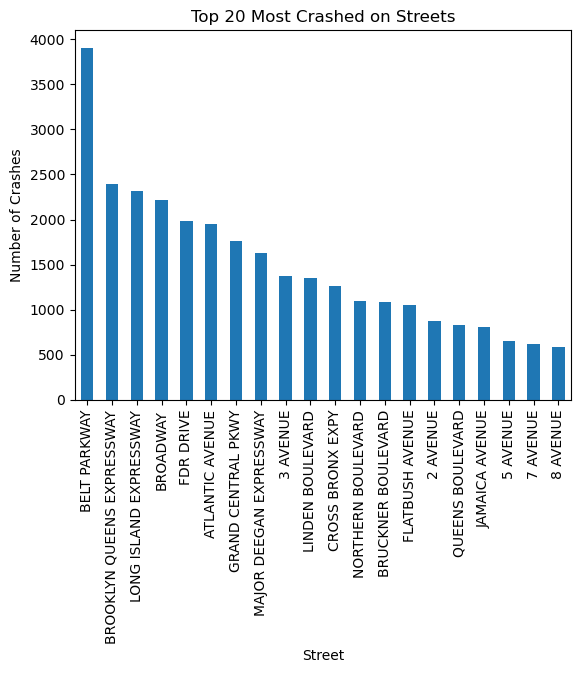

In [14]:

FirstStreet_Count.head(20).plot(kind='bar')
plt.xlabel('Street')
plt.ylabel('Number of Crashes')
plt.title('Top 20 Most Crashed on Streets')
plt.show()

In [15]:
SecondStreet_Count = FirstStreet_df['CROSS STREET NAME'].value_counts()
SecondStreet_Count_df = pd.DataFrame({'CROSS STREET NAME': SecondStreet_Count.index, 'Count': SecondStreet_Count.values})
SecondStreet_Count_df.head(20)


,CROSS STREET NAME,Count
0,PENNSYLVANIA AVENUE,141
1,WOODHAVEN BOULEVARD,96
2,VANWYCK EXPRESSWAY,78
3,EAST 138 STREET,75
4,LEGGETT AVENUE,74
5,LOGAN STREET,69
6,GRAND ARMY PLAZA,69
7,HUNTS POINT AVENUE,60
8,TIFFANY STREET,60
9,WEST FORDHAM ROAD,60


In [16]:
Secondtop_20 = SecondStreet_Count_df.nlargest(20, 'Count')
Intersections_df = FirstStreet_df.merge(Secondtop_20, on='CROSS STREET NAME')
Intersections_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,Count
0,12/03/2022,17:50,QUEENS,-1,"(40.733498, -73.87038)",QUEENS BOULEVARD,WOODHAVEN BOULEVARD,96
1,06/22/2021,14:30,QUEENS,-1,"(40.733536, -73.87035)",QUEENS BOULEVARD,WOODHAVEN BOULEVARD,96
2,07/04/2023,13:22,QUEENS,-1,"(40.733498, -73.87038)",QUEENS BOULEVARD,WOODHAVEN BOULEVARD,96
3,05/27/2022,17:00,QUEENS,-1,"(40.733498, -73.87038)",QUEENS BOULEVARD,WOODHAVEN BOULEVARD,96
4,06/03/2023,21:30,QUEENS,-1,"(40.733498, -73.87038)",QUEENS BOULEVARD,WOODHAVEN BOULEVARD,96
...,...,...,...,...,...,...,...,...
1241,06/24/2023,14:35,BRONX,-1,"(40.813095, -73.89827)",BRUCKNER BOULEVARD,LEGGETT AVENUE,74
1242,09/18/2023,23:30,BRONX,-1,"(40.813095, -73.89827)",BRUCKNER BOULEVARD,LEGGETT AVENUE,74
1243,09/12/2021,17:13,BRONX,-1,"(40.813095, -73.89827)",BRUCKNER BOULEVARD,LEGGETT AVENUE,74
1244,07/14/2023,18:00,BRONX,-1,"(40.813095, -73.89827)",BRUCKNER BOULEVARD,LEGGETT AVENUE,74


In [19]:
ZipCode_Count = Location_df['ZIP CODE'].value_counts()
ZipCode_Count_df = pd.DataFrame({'ZIP CODE': ZipCode_Count.index, 'Count': ZipCode_Count.values})
ZipCode_Countskip1_df = ZipCode_Count_df.iloc[1:]
ZipCode_Countskip1_df

,ZIP CODE,Count
1,11207,7063
2,11101,5906
3,10022,5782
4,10016,5758
5,10019,5649
...,...,...
189,10168,4
190,10803,2
191,10048,1
192,10153,1


In [20]:
ZipCodetop26 = ZipCode_Count_df.nlargest(26, 'Count')
Zipcodetop25skip1 = ZipCodetop26.iloc[1:]
ZipCodetop25_df = Zipcodetop25skip1
ZipCodetop25_df

,ZIP CODE,Count
1,11207,7063
2,11101,5906
3,10022,5782
4,10016,5758
5,10019,5649
6,10036,5454
7,11201,5200
8,10001,5158
9,11203,4836
10,10013,4649


In [21]:
shapefile = gpd.read_file("Q1_resources/NYZIPCODES/ZIP_CODE_040114.shp")

In [22]:
ZipCodetop25_df['ZIP CODE'] = ZipCodetop25_df['ZIP CODE'].astype(str)
NYZIPCODE_df = shapefile.merge(ZipCodetop25_df, left_on='ZIPCODE', right_on='ZIP CODE', how='left')
NYZIPCODE_df['ZIP CODE'] = NYZIPCODE_df['ZIP CODE'].str.replace('     ','-1').fillna('-1').astype(int)
NYZIPCODE_df

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP CODE,Count
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",-1,NaN
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,3817.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,3789.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",-1,NaN
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",-1,NaN
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",-1,NaN
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",-1,NaN
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",-1,NaN


In [27]:
ZipCode_Countskip1_df['ZIP CODE'] = ZipCode_Countskip1_df['ZIP CODE'].astype(str)
AllNYZIP_df = shapefile.merge(ZipCode_Countskip1_df, left_on='ZIPCODE', right_on='ZIP CODE', how='left')
AllNYZIP_df['ZIP CODE'] = AllNYZIP_df['ZIP CODE'].str.replace('     ','-1').fillna('-1').astype(int)
AllNYZIP_df

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP CODE,Count
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,790.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,3817.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,3789.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,2702.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,2888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",10310,1334.0
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",11693,484.0
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",11249,1358.0
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",10162,1.0


In [32]:
AllNYZIPsorted_df = AllNYZIP_df.sort_values(by="POPULATION", ascending=False)
AllNYZIPsorted_df.head(50)


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP CODE,Count
73,11368,0,Corona,109069.0,7.248966e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1022299.623 218703.908, 1022285.600 ...",11368,3046.0
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.473 177865.718, 994891.817 17...",11226,4182.0
201,11373,0,Elmhurst,101282.0,4.265486e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1015508.539 204353.966, 1015508.502 ...",11373,3432.0
99,11385,0,Ridgewood,98436.0,1.247863e+08,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1007499.885 199242.452, 1007573.769 ...",11385,4426.0
13,10467,0,Bronx,97932.0,6.933617e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1017396.306 265444.470, 1017471.420 ...",10467,3870.0
129,11220,0,Brooklyn,97257.0,4.745379e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((977453.890 176425.139, 977471.179 17...",11220,4076.0
51,10025,0,New York,96054.0,1.963104e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((995501.655 232971.115, 995396.152 23...",10025,2631.0
128,11236,0,Brooklyn,94480.0,9.637399e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1012306.415 178457.610, 1012350.198 ...",11236,4356.0
111,11208,0,Brooklyn,94410.0,7.930368e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1021326.923 188270.016, 1021333.109 ...",11208,3946.0
112,11207,0,Brooklyn,93556.0,7.396626e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1010961.260 190844.518, 1010984.556 ...",11207,7063.0


Text(0.5, 1.0, 'Population of NYC by Zip Code')

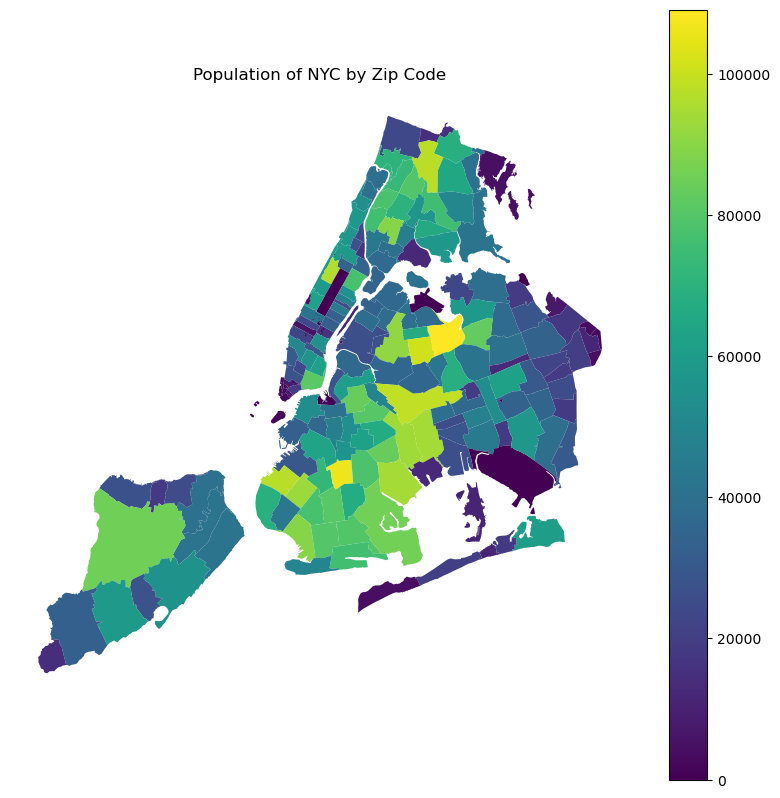

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
NYZIPCODE_df.plot(column='POPULATION', cmap='viridis', legend=True, ax=ax)
ax.set_axis_off()
plt.title("Population of NYC by Zip Code")

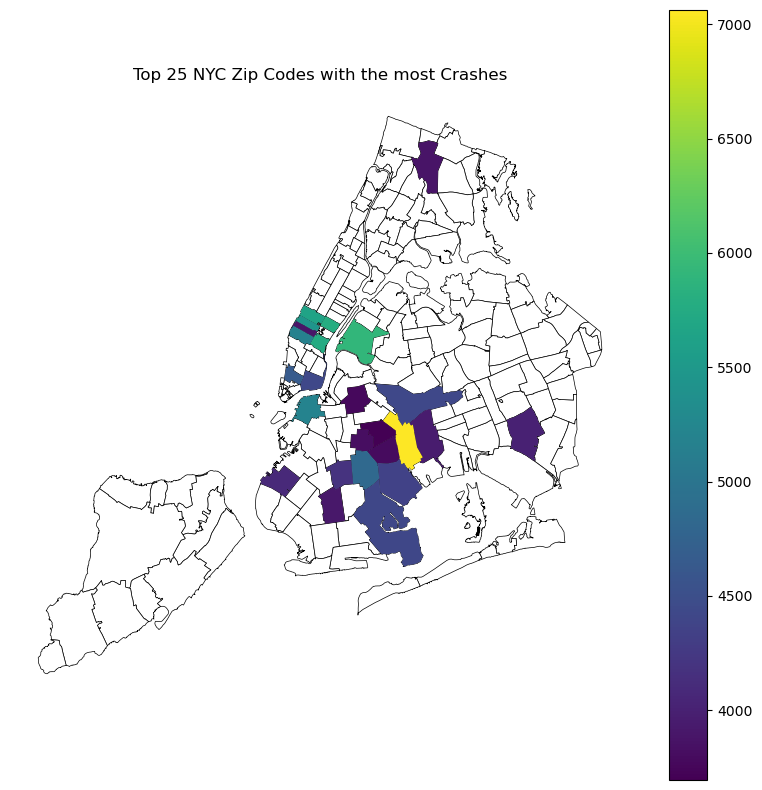

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
AllNYZIP_df.plot(color='white', edgecolor='black', ax=ax, linewidth=0.5)
NYZIPCODE_df.plot(column='Count', cmap='viridis', legend=True, ax=ax)
ax.set_axis_off()
plt.title("Top 25 NYC Zip Codes with the most Crashes")
plt.show() 